In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge
scaler = StandardScaler()
le = LabelEncoder()

In [2]:
df = pd.read_csv('car_price_prediction.csv')
df

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4


In [3]:
df.drop([16983,8541,1225], inplace=True)
df.sort_values(by='Price')

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
7815,45765530,1,-,OPEL,Astra,1999,Sedan,Yes,Petrol,1.6,122231 km,4.0,Manual,Front,04-May,Left wheel,Silver,4
16992,45772201,1,1202,CHEVROLET,Lacetti,2006,Hatchback,No,Petrol,1.6,200000 km,4.0,Manual,Front,04-May,Left wheel,Black,2
4958,45765552,3,1502,VOLKSWAGEN,Jetta,2014,Sedan,Yes,Petrol,1.8 Turbo,134400 km,4.0,Tiptronic,Front,04-May,Right-hand drive,Black,6
4776,45687380,3,810,VOLKSWAGEN,Jetta,2016,Sedan,Yes,Petrol,1.8 Turbo,41000 km,4.0,Automatic,Front,04-May,Left wheel,White,8
14642,45816369,3,87,PORSCHE,Panamera,2011,Sedan,Yes,Petrol,0,196800 km,6.0,Automatic,Rear,04-May,Left wheel,Black,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10759,45291161,260296,-,LEXUS,LX 570,2018,Jeep,Yes,Petrol,5.7 Turbo,17700 km,8.0,Tiptronic,4x4,04-May,Left wheel,Black,10
7749,45760644,288521,2269,BMW,M5 Машина в максимально,2018,Sedan,Yes,Petrol,4.4,13500 km,8.0,Tiptronic,4x4,04-May,Left wheel,Black,0
9367,45229113,297930,-,MERCEDES-BENZ,AMG GT S,2015,Coupe,Yes,Petrol,4.0 Turbo,20000 km,8.0,Tiptronic,Rear,02-Mar,Left wheel,White,16
14839,45792307,297930,-,LAND ROVER,Range Rover Vogue,2019,Jeep,Yes,Diesel,3.0 Turbo,4500 km,8.0,Tiptronic,4x4,04-May,Left wheel,Black,12


In [4]:
df['Engine volume'].value_counts()

Engine volume
2            3916
2.5          2277
1.8          1760
1.6          1462
1.5          1321
             ... 
6.8             1
6.7             1
3.1             1
0.8 Turbo       1
1.1 Turbo       1
Name: count, Length: 107, dtype: int64

In [5]:
df["Doors"] = df["Doors"].replace(["02-Mar","04-May",">5"], [2,4,6])
df["Leather interior"] = df["Leather interior"].replace(["Yes","No"], [2,1])
df["Mileage"] = df["Mileage"].str.extract(r"(\d+)").astype(int)
df['Levy'] = df['Levy'].replace(["-"],[0])
df['Wheel'] = df['Wheel'].replace(['Left wheel','Right-hand drive'],[1,2])

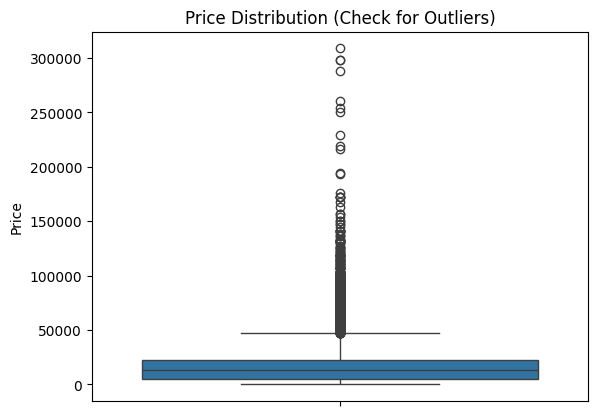

In [6]:
sns.boxplot(y=df["Price"])
plt.title("Price Distribution (Check for Outliers)")
plt.show()

In [7]:
df['Levy'] = df['Levy'].astype('int32')
df.dtypes

ID                    int64
Price                 int64
Levy                  int32
Manufacturer         object
Model                object
Prod. year            int64
Category             object
Leather interior      int64
Fuel type            object
Engine volume        object
Mileage               int32
Cylinders           float64
Gear box type        object
Drive wheels         object
Doors                 int64
Wheel                 int64
Color                object
Airbags               int64
dtype: object

In [8]:
#sequential = pd.Series(df["Manufacturer"].unique()).reset_index().rename(columns={0: "Manufacturer"})
#df.merge(sequential, on='Manufacturer')


In [9]:
#df.drop(['Manufacturer'],axis=1, inplace=True)
#df.drop(['Drive wheels'],axis=1, inplace=True)
#df.drop(['Model'],axis=1, inplace=True)
#df.rename(columns = {'index':'Manufacturer'},inplace==True)

In [10]:
df[['Price','Levy']] = scaler.fit_transform(df[['Price','Levy']])
df.drop("ID", axis=1, inplace=True)
df.drop(['Gear box type','Levy'], axis=1, inplace=True)
#df['Prod. year'].astype(object)

In [11]:
categorical_cols = df.select_dtypes(include=["object"]).columns
print("Categorical Columns:", categorical_cols)

Categorical Columns: Index(['Category', 'Fuel type', 'Engine volume', 'Color'], dtype='object')


In [12]:
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [13]:
X = df.drop("Price", axis=1)  # Features
y = df["Price"]  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
rf_model = RandomForestRegressor(n_estimators=200, max_depth=5, random_state=42)
rf_model.fit(X_train,y_train)

y_pred = rf_model.predict(X_test)

In [15]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
print(f"the RMSE is {rmse}, and the R value is {r2}")

the RMSE is 0.7633675653108675, and the R value is 0.3809647744097917


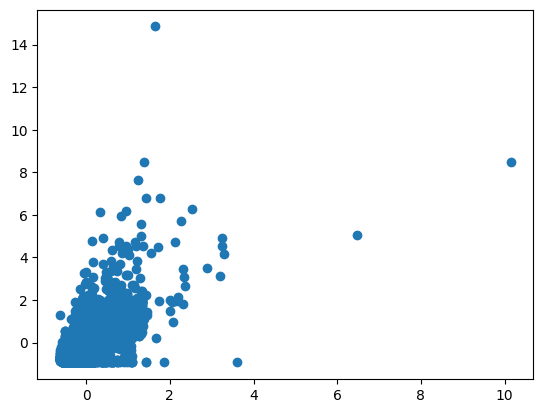

In [16]:
plt.scatter(y_pred,y_test)

In [17]:
pred = rf_model.predict(X_train)

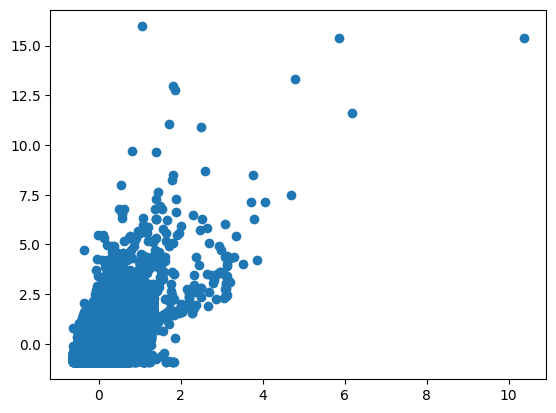

In [18]:
plt.scatter(pred,y_train)

In [19]:
print(X_train.head())

       Prod. year  Category  Leather interior  Fuel type  Engine volume  \
13217        2013         9                 1          5             32   
15418        2010         7                 2          1             46   
7559         2006         7                 1          1             41   
14747        2010         9                 2          5             28   
381          2010         4                 2          1             36   

       Mileage  Cylinders  Doors  Wheel  Color  Airbags  
13217    88000        4.0      4      1     14        6  
15418    71517        4.0      4      1     15        4  
7559    188000        4.0      4      2     14        2  
14747   104282        4.0      4      1     12        4  
381     120000        4.0      4      1     12        4  


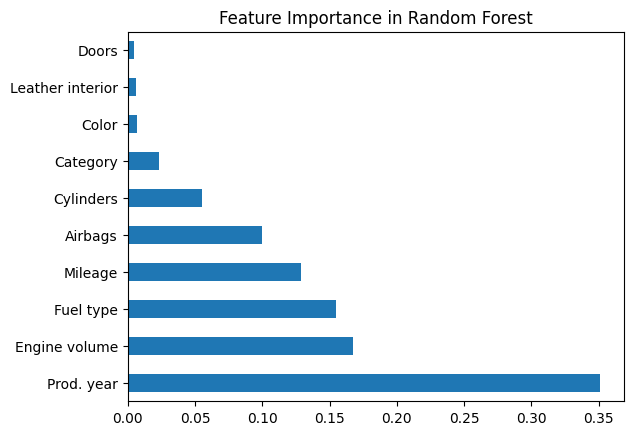

In [20]:
feature_importance = pd.Series(rf_model.feature_importances_, index=X_train.columns)
feature_importance.nlargest(10).plot(kind='barh')
plt.title("Feature Importance in Random Forest")
plt.show()

In [21]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf_model = RandomForestRegressor(n_estimators=200, random_state=42)
rf_model.fit(X_train,y_train)

y_pred = rf_model.predict(X_test)

rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
print(f"the RMSE is {rmse}, and the R value is {r2}")

the RMSE is 0.5790047301345752, and the R value is 0.6438670315997376


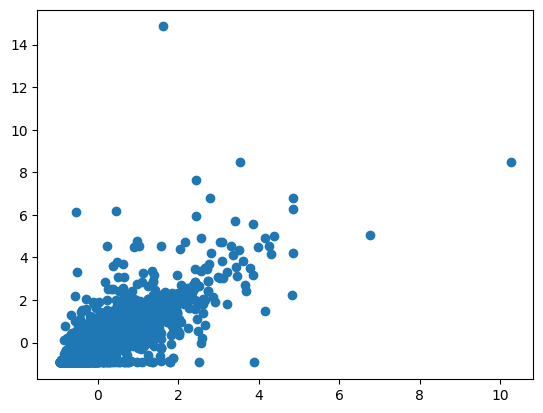

In [22]:
plt.scatter(y_pred,y_test)

In [ ]:
param_grid = {
    "n_estimators": [50, 100, 200,300,400,500],
    "learning_rate": [0.01, 0.1, 0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],
    "max_depth": [3, 5, 7,9,11]
}
grid_search = GridSearchCV(XGBRegressor(), param_grid, cv=5, scoring="neg_root_mean_squared_error")
grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)

In [ ]:
xgb_model = XGBRegressor(
    n_estimators=200,    # Number of trees (boosting rounds)
    learning_rate=0.2,   # Controls step size (higher = faster learning, but risk of overfitting)
    max_depth=5,         # Limits tree depth (prevents overfitting)
    random_state=42
)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

In [ ]:
plt.scatter(y_pred_xgb,y_test)

In [ ]:
base_models = [
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('ridge', Ridge(alpha=1.0))
]

# Stacking Model
stacking_model = StackingRegressor(estimators=base_models, final_estimator=XGBRegressor())
stacking_model.fit(X_train, y_train)

# Evaluate performance
y_pred_stack = stacking_model.predict(X_test)
print("Stacking Model RMSE:", mean_squared_error(y_test, y_pred_stack, squared=False))
print("Stacking Model R² Score:", r2_score(y_test, y_pred_stack))

In [ ]:
plt.scatter(y_pred_stack,y_test)